In [40]:
# Environment setup
import pandas as pd
import numpy as n
import json
from sklearn.model_selection import train_test_split

import sys
sys.path.append('/Users/kleomeniskogias/Visual Studio codee/Mycodes')

from src.helpful_functions import read_json_as_dict
from src.one_hot_encoding import encode_categorical_variable, join_to_df
from src.classification_class import CustomClassifier

TODO
1. Correlation between input variables
2. Cleaning of data
3. oversampling


In [195]:
# Missing values
print(X_data[X_data['hispanic origin'] == ' NA'].shape[0])
print(X_data[X_data['state of previous residence'] == ' ?'].shape[0])

# Missing values for the same 74944 people
print(X_data[X_data['migration code-change in msa'] == ' ?'].shape[0])
print(X_data[X_data['migration code-change in reg'] == ' ?'].shape[0])
print(X_data[X_data['migration code-move within reg'] == ' ?'].shape[0])
print(X_data[X_data['migration prev res in sunbelt'] == ' ?'].shape[0])

# Country of birth
print(X_data[X_data['country of birth father'] == ' ?'].shape[0])
print(X_data[X_data['country of birth mother'] == ' ?'].shape[0])
print(X_data[X_data['country of birth self'] == ' ?'].shape[0])

848
698
74944
74944
74944
74944
6383
5810
3322


In [190]:
# Create new column
capital_fields = X_data[['capital gains', 'capital losses', 'dividends from stocks']].join(y)
X_data['alternative_income_sources'] = X_data['capital gains'] + X_data['dividends from stocks'] - X_data['capital losses']

user_id
0            0
1            0
2            0
3            0
4            0
          ... 
152891    6849
152892       0
152893    6427
152894     157
152895       0
Length: 152896, dtype: int64

In [173]:
X_data[['hispanic origin']].value_counts()

hispanic origin           
 All other                    128819
 Mexican (Mexicano)             6310
 Mexican-American               6026
 Central or South American      3804
 Puerto Rican                   3064
 Other Spanish                  2339
 Cuban                          1094
 NA                              848
 Chicano                         298
 Do not know                     294
dtype: int64

In [4]:
# Configurations
columns_type = read_json_as_dict("config/features_type.json")

In [5]:
# Read training data
training_data = pd.read_csv("data/census_income_learn.csv", index_col=False, header=None)
print(training_data.shape)

# Delete the weighting column
training_data  = training_data.drop(training_data.iloc[:,24:25], axis = 1)
training_data.shape

# Read test dataset
test_data = pd.read_csv("data/census_income_test.csv", index_col=False, header=None)
test_data = test_data.drop(test_data.iloc[:,24:25], axis = 1)
print(test_data.shape)

(199523, 42)
(99762, 41)


In [ ]:
training_data

In [6]:
# Drop duplicates - There is no user id in order to know whether it is the same user or not
training_data.drop_duplicates(inplace=True)
test_data.drop_duplicates(inplace=True)

print(training_data.shape, test_data.shape)


(152896, 41) (78864, 41)


In [16]:
# Add a user_id with the assumption that one submision belongs to a distinct user
training_data['user_id'] = list(range(0, training_data.shape[0] ))
training_data = training_data.set_index('user_id')

test_data['user_id'] = list(range(training_data.shape[0], test_data.shape[0] + training_data.shape[0] ))
test_data = test_data.set_index('user_id')

In [81]:
X_data = training_data.loc[:, 0:40]
X_data.columns = list(columns_type.keys())
X_data

y = training_data.loc[:, 41]
print(X_data.shape, y.shape)

(152896, 40) (152896,)


In [90]:
X_data

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,...,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year
user_id,,,,,,,,,,,,,,,,,,,,,
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152891,39,Private,43,26,Bachelors degree(BA AB BS),0,Not in universe,Never married,Education,Adm support including clerical,...,Not in universe,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,2,Not in universe,2,52,95
152892,87,Not in universe,0,0,7th and 8th grade,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Not in universe,Canada,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95
152893,65,Self-employed-incorporated,37,2,11th grade,0,Not in universe,Married-civilian spouse present,Business and repair services,Executive admin and managerial,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94


In [83]:
# Save data distribution to a file
with open('data_distribution.txt', 'w') as f:
    for i, col in enumerate(X_data.columns):
        print(f"------------------ {i, col} ----------------------", file = f)
        print (X_data[[col]].value_counts(), file=f)

# Classification

<AxesSubplot: title={'center': 'Labels Percentages'}, ylabel='Label'>

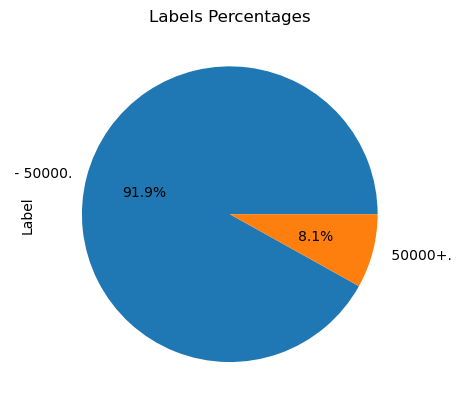

In [84]:
y.name = "Label"
y.value_counts().plot.pie(autopct='%1.1f%%', title = "Labels Percentages")

In [85]:
y.value_counts()

 - 50000.    140529
 50000+.      12367
Name: Label, dtype: int64

In [86]:
y = y.apply(lambda x : 0 if x == ' - 50000.' else 1)

In [87]:
continuous_variables = []
encoded_variables = []
for key, value in columns_type.items():
    if value == 'continuous':
        continuous_variables.append(key)
    else:
        encoded_variables.append(key)

In [88]:
# One Hot Encode Categorical Variables
all_encoded_data = pd.DataFrame()
for col in encoded_variables:
    encoded_data = encode_categorical_variable(input_df=X_data.reset_index(), col_name = col, id_col = 'user_id')
    all_encoded_data = join_to_df(encoded_data, all_encoded_data)

all_encoded_data 

,class of worker_ Federal government,class of worker_ Local government,class of worker_ Never worked,class of worker_ Not in universe,class of worker_ Private,class of worker_ Self-employed-incorporated,class of worker_ Self-employed-not incorporated,class of worker_ State government,class of worker_ Without pay,detailed industry recode_0,...,own business or self employed_1,own business or self employed_2,fill inc questionnaire for veteran's admin_ No,fill inc questionnaire for veteran's admin_ Not in universe,fill inc questionnaire for veteran's admin_ Yes,veterans benefits_0,veterans benefits_1,veterans benefits_2,year_94,year_95
user_id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,1,0
2,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,1
3,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0
4,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152891,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,1
152892,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,1
152893,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0


In [55]:
all_encoded_data.sum().reset_index().sort_values(0).head(20)

,index,0
300,detailed household and family stat_ Other Rel ...,1
280,detailed household and family stat_ Child <18 ...,2
288,detailed household and family stat_ Grandchild...,2
287,detailed household and family stat_ Grandchild...,2
304,detailed household and family stat_ Other Rel ...,3
303,detailed household and family stat_ Other Rel ...,4
19,detailed industry recode_10,4
284,detailed household and family stat_ Grandchild...,6
299,detailed household and family stat_ Other Rel ...,6
276,detailed household and family stat_ Child <18 ...,9


In [91]:
# Build the dataset that is going to be used for the classification purpose
X = (X_data[continuous_variables].join(all_encoded_data))
valid_column_names = [col.replace('<', 'less than ') for col in X.columns ]
X.columns = valid_column_names
print(X.shape, y.shape)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

(152896, 510) (152896,)
(107027, 510) (107027,) (45869, 510) (45869,)


In [93]:
for col in X.columns:
    if '<' in col:
        print(col)

In [94]:
# Random Forest
print(" --------------------- RF --------------------")
classifiers_outputs_temp_temp_temp_temp_temp_temp_temp_temp_temp_temp_temp_temp_temp_temp_temp_temp_temp_temp_temp_temp_temp_temp_temp = {}
rf = CustomClassifier("RF")
rf.set_train_and_test_data(X_train, X_val, y_train, y_val)
rf.fit_model()
rf.estimate_accuracy()
rf.estimate_precision()
rf.estimate_f1_score()
rf.estimate_training_accuracy()

# Logistic Regression
print(" --------------------- LR --------------------")
lr = CustomClassifier("LR")
lr.set_train_and_test_data(X_train, X_val, y_train, y_val)
lr.fit_model()

lr.estimate_accuracy()
lr.estimate_precision()
lr.estimate_f1_score()
lr.estimate_training_accuracy()

# XGBoost
print(" --------------------- XGB --------------------")
xgb = CustomClassifier("XGBoost")
xgb.set_train_and_test_data(X_train, X_val, y_train, y_val)
xgb.fit_model()
xgb.estimate_accuracy()
xgb.estimate_precision()
xgb.estimate_f1_score()
xgb.estimate_training_accuracy()

 --------------------- RF --------------------
RF
Accuracy of RF classifier on test set: 0.9385
Precision of RF classifier on test set: 0.7327
F1-score (unweighted) of RF classifier on test set: 0.7337
F1-score (weigthed) of RF classifier on test set: 0.9294
Accuracy of RF classifier on training set: 0.9996
 --------------------- LR --------------------
LR


/Users/kleomeniskogias/opt/anaconda3/envs/outra_kernel/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of LR classifier on test set: 0.9281
Precision of LR classifier on test set: 0.7442
F1-score (unweighted) of LR classifier on test set: 0.6209
F1-score (weigthed) of LR classifier on test set: 0.9068
Accuracy of LR classifier on training set: 0.9284
 --------------------- XGB --------------------
XGBoost


/Users/kleomeniskogias/opt/anaconda3/envs/outra_kernel/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/kleomeniskogias/opt/anaconda3/envs/outra_kernel/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:11:27] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XGBoost classifier on test set: 0.9449
Precision of XGBoost classifier on test set: 0.7516
F1-score (unweighted) of XGBoost classifier on test set: 0.7776
F1-score (weigthed) of XGBoost classifier on test set: 0.9392
Accuracy of XGBoost classifier on training set: 0.9531


0.9531

In [97]:
from datetime import date

today = date.today()
print(today)

2023-01-03


In [124]:
from datetime import datetime
x = datetime.now()
print(x)
x.strftime("%d/%m/%Y, %H:%M")

2023-01-03 17:44:38.765972


'03/01/2023, 17:44'

In [111]:
x = None
x is None

True

In [151]:
def save_dataframe_to_csv(dataframe, filename):
    dataframe.to_csv(filename)

def get_date_timestamp():
    ts = datetime.now()
    return ts.strftime("%d/%m/%Y, %H:%M")

def save_model_performance_in_dataframe(version, running_date = get_date_timestamp(), classifiers_list = [rf, lr, xgb], save_flag = 1):
    # Create a dataframe with the resutls
    column_names = []
    for classifier in classifiers_list:
        column_names.append(classifier.model) # ["RF", "LR", "XGBoost"]
    # Populate dataframe
    classifiers_outputs_temp = pd.DataFrame(columns = column_names, index = ["Accuracy" , "Precision", "F1_score unweighted", "F1_score weighted", "Training Accuracy", "Version", "Date"])
    for classifier in classifiers_list:
        classifiers_outputs_temp.loc['Training Accuracy', classifier.model] = round(classifier.training_accuracy, 3)
        classifiers_outputs_temp.loc['Accuracy', classifier.model] = round(classifier.accuracy, 3)
        classifiers_outputs_temp.loc['Precision', classifier.model] = round(classifier.precision, 3)
        classifiers_outputs_temp.loc['F1_score unweighted', classifier.model] = round(classifier.f1_score_macro, 3)
        classifiers_outputs_temp.loc['F1_score weighted', classifier.model] = round(classifier.f1_score_weighted, 3)
        classifiers_outputs_temp.loc['Version', classifier.model] = version
        classifiers_outputs_temp.loc['Date', classifier.model] = running_date
    classifiers_outputs_temp = classifiers_outputs_temp.T
    classifiers_outputs_temp = classifiers_outputs_temp.reset_index().rename(columns = {'index' : 'Model'}).set_index('Date')
    # print(classifiers_outputs_temp)
    # If there is a csv file get the CSV
    try:
        classifiers_outputs = pd.read_csv("data/Processing/model_performance.csv").set_index('Date')
    except:
        print("The classifier_outputs csv does not exist")
        print("Creating the classifiers output pandas dataframe...")
        classifiers_outputs = classifiers_outputs_temp
    else:
        classifiers_outputs = classifiers_outputs.append(classifiers_outputs_temp)


    if save_flag:
        save_dataframe_to_csv(classifiers_outputs, "./data/Processing/model_performance.csv")

    return classifiers_outputs

In [152]:
classifiers_outputs.T

,Accuracy,Precision,F1_score unweighted,F1_score weighted,Training Accuracy,Version,Date
RF,0.938,0.733,0.734,0.929,1.0,Basic Implementation,2022-12-28
LR,0.928,0.744,0.621,0.907,0.928,Basic Implementation,2022-12-28
XGBoost,0.945,0.752,0.778,0.939,0.953,Basic Implementation,2022-12-28


In [157]:
datetime(2022, 12, 28, 20, 55).strftime("%d/%m/%Y, %H:%M")

'28/12/2022, 20:55'

In [158]:
# save_model_performance_in_dataframe(version = 'Basic Implementation', running_date=datetime(2022, 12, 28, 20, 55).strftime("%d/%m/%Y, %H:%M") , save_flag=1)
save_model_performance_in_dataframe(version = 'Basic Implementation', save_flag=1)

['RF', 'LR', 'XGBoost']
                     Model Accuracy Precision F1_score unweighted  \
Date                                                                
28/12/2022, 20:55       RF    0.938     0.733               0.734   
28/12/2022, 20:55       LR    0.928     0.744               0.621   
28/12/2022, 20:55  XGBoost    0.945     0.752               0.778   

                  F1_score weighted Training Accuracy               Version  
Date                                                                         
28/12/2022, 20:55             0.929               1.0  Basic Implementation  
28/12/2022, 20:55             0.907             0.928  Basic Implementation  
28/12/2022, 20:55             0.939             0.953  Basic Implementation  
The classifier_outputs csv does not exist
Creating the classifiers output pandas dataframe...


,Model,Accuracy,Precision,F1_score unweighted,F1_score weighted,Training Accuracy,Version
Date,,,,,,,
"28/12/2022, 20:55",RF,0.938,0.733,0.734,0.929,1.0,Basic Implementation
"28/12/2022, 20:55",LR,0.928,0.744,0.621,0.907,0.928,Basic Implementation
"28/12/2022, 20:55",XGBoost,0.945,0.752,0.778,0.939,0.953,Basic Implementation


In [ ]:
save_model_performance_in_dataframe()

In [108]:
classifiers_outputs.T.reset_index().rename(columns = {'index' : 'Model'}).set_index('Date')

,Model,Accuracy,Precision,F1_score unweighted,F1_score weighted,Training Accuracy,Version
Date,,,,,,,
2022-12-28,RF,0.938,0.733,0.734,0.929,1.0,Basic Implementation
2022-12-28,LR,0.928,0.744,0.621,0.907,0.928,Basic Implementation
2022-12-28,XGBoost,0.945,0.752,0.778,0.939,0.953,Basic Implementation


In [159]:
# # Results formatted
# classifiers_list = [rf, lr, xgb]
# version = 'Basic Implementation'
# running_date = '2022-12-28'
# column_names = []
# for classifier in classifiers_list:
#     column_names.append(classifier.model) # ["RF", "LR", "XGBoost"]
# classifiers_outputs = pd.DataFrame(columns = column_names, index = ["Accuracy" , "Precision", "F1_score unweighted", "F1_score weighted", "Training Accuracy", "Version", "Date"])
# for classifier in classifiers_list:
#     classifiers_outputs.loc['Training Accuracy', classifier.model] = round(classifier.training_accuracy, 3)
#     classifiers_outputs.loc['Accuracy', classifier.model] = round(classifier.accuracy, 3)
#     classifiers_outputs.loc['Precision', classifier.model] = round(classifier.precision, 3)
#     classifiers_outputs.loc['F1_score unweighted', classifier.model] = round(classifier.f1_score_macro, 3)
#     classifiers_outputs.loc['F1_score weighted', classifier.model] = round(classifier.f1_score_weighted, 3)
#     classifiers_outputs.loc['Version', classifier.model] = version
#     classifiers_outputs.loc['Date', classifier.model] = running_date

# classifiers_outputs.T#.to_clipboard()